# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define count pass
count_one = 0
set_one = 1


In [2]:
#OpenWeatherMap API Key
api_key = "772642f0e1e78528ac763a93fb987274"
units = "imperial"
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | havoysund
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | zyryanka
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kuryk
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | rurrenabaque
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | ozinki
City not found. Skipping...
Processing Record 12 of Set 1 | moree
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | hobart
City not found. Skipping...
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | cap-aux-meules
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | veraval
Processing Record 22 of Set 1 | muisne
Processing Record 23 of Set 1 | port alfred
Proce

Processing Record 37 of Set 4 | dongning
Processing Record 38 of Set 4 | kindu
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | bagdarin
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | pedasi
Processing Record 43 of Set 4 | kolosovka
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | ayagoz
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | ponta delgada
Processing Record 49 of Set 4 | mendeleyevo
City not found. Skipping...
Processing Record 1 of Set 5 | bonnyville
Processing Record 2 of Set 5 | chipinge
Processing Record 3 of Set 5 | auki
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | hofn
Processing Record 6 of Set 5 | hohhot
Processing Record 7 of Set 5 | panaba
Processing Record 8 of Set 5 | zeya
Processing Record 9 of Set 5 | darovskoy
Processing Record 10 of Set 5 | susanville
Processing Record 11 of Set 5 | fez
Processing 

Processing Record 26 of Set 8 | cidreira
Processing Record 27 of Set 8 | champerico
Processing Record 28 of Set 8 | ust-koksa
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | muhos
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | areosa
Processing Record 33 of Set 8 | saint-louis
Processing Record 34 of Set 8 | calama
Processing Record 35 of Set 8 | meadow lake
Processing Record 36 of Set 8 | hamina
City not found. Skipping...
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | micheweni
Processing Record 39 of Set 8 | rodrigues alves
Processing Record 40 of Set 8 | port hardy
Processing Record 41 of Set 8 | kysyl-syr
Processing Record 42 of Set 8 | nanning
Processing Record 43 of Set 8 | boma
Processing Record 44 of Set 8 | maragogi
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | seydi
Processing Record 47 of Set 8 | tsiroanomandidy
Processing Record 48 of Set 8 | jumla
Processing Record 49 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create a dictionary for establishing dataframe
weather_dict = {"City":city_two, 
                "Cloudinesses":cloudinesses,
                 "Date":dates,
                "Humidity":humidities,
                "Latitude": lats,
                "Longitude": lngs,
                "Temperature": max_temps,
                "Wind Speed": wind_speeds,
                "Countries": countries
               }

In [6]:
#Create the DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudinesses,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed,Countries
0,havoysund,100,1604787842,93,71.00,24.66,37.40,19.46,NO
1,kapaa,40,1604787842,83,22.08,-159.32,82.40,12.75,US
2,zyryanka,100,1604787842,92,65.75,150.85,-4.52,6.13,RU
3,ushuaia,75,1604787545,44,-54.80,-68.30,59.00,12.75,AR
4,kuryk,100,1604787843,57,43.20,51.65,52.59,18.68,KZ


In [7]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)

In [8]:
weather_df.count()

City            540
Cloudinesses    540
Date            540
Humidity        540
Latitude        540
Longitude       540
Temperature     540
Wind Speed      540
Countries       540
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

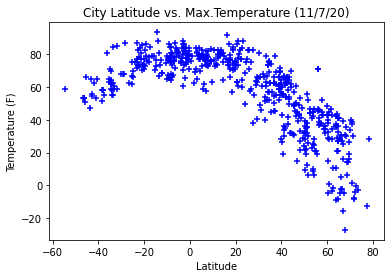

In [17]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temperature"]
plt.scatter(x_axis, y_axis, marker = '+', edgecolors = 'black', facecolors = 'blue')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Max.Temperature (11/7/20)")
plt.show()


#### Latitude vs. Humidity Plot

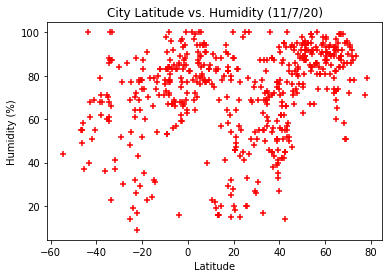

In [19]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]
plt.scatter(x_axis, y_axis, marker = '+', edgecolors = 'black', facecolors = 'red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (11/7/20)")
plt.show()

#### Latitude vs. Cloudiness Plot

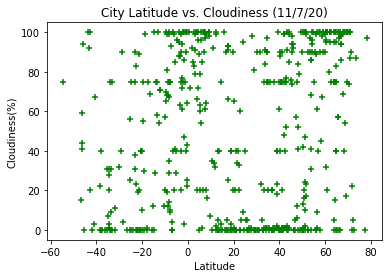

In [24]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Cloudinesses"]
plt.scatter(x_axis, y_axis, marker = '+', edgecolors = 'black', facecolors = 'green')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness (11/7/20)")
plt.show()

#### Latitude vs. Wind Speed Plot

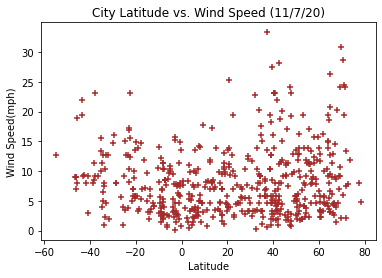

In [22]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = '+', edgecolors = 'black', facecolors = 'brown')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed (11/7/20)")
plt.show()